In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from lightgbm import LGBMClassifier
import xgboost as xgb
import lightgbm as lgb

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# Explorary Data Analysis

In [3]:
df.shape

(768, 9)

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

[]

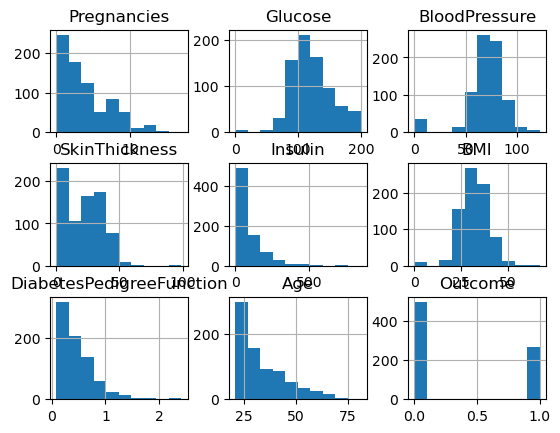

In [5]:
df.hist()
plt.plot()

In [6]:
df.duplicated().sum()

0

<Axes: >

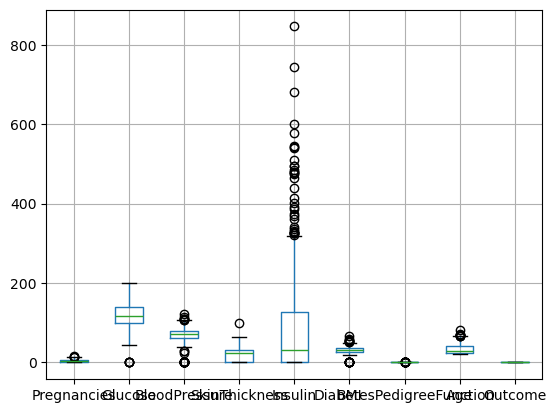

In [7]:
df.boxplot()

In [8]:
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme=Q1-(1.5*IQR)
    upper_extreme=Q3+(1.5*IQR)
    df[column]=df[column].apply(lambda x:lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df:
    outlier_capping(df,col)

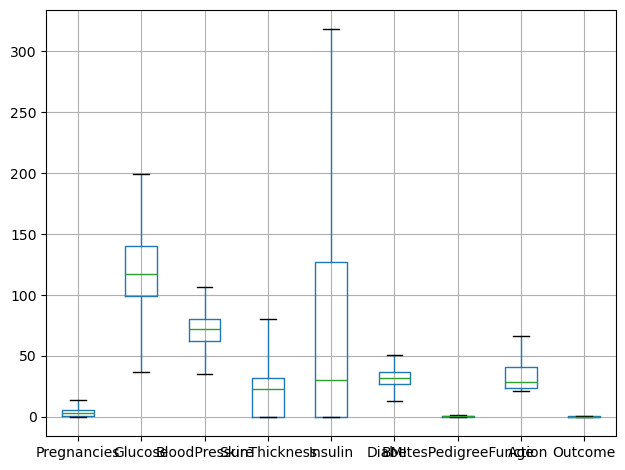

In [9]:
df.boxplot()
plt.tight_layout()
plt.show()

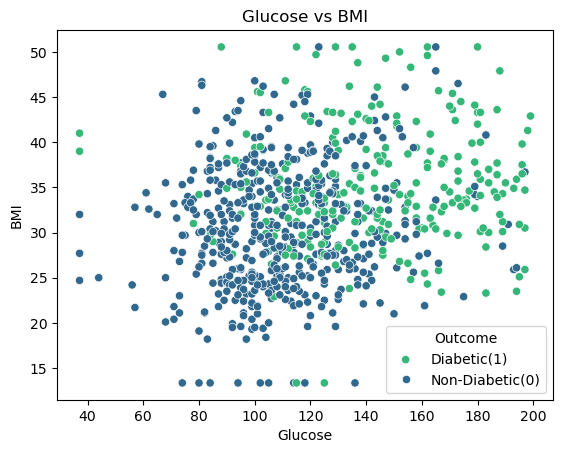

In [10]:
sns.scatterplot(x='Glucose',y='BMI',data=df,hue='Outcome',palette='viridis')
plt.title('Glucose vs BMI')
plt.legend(title='Outcome',labels=['Diabetic(1)','Non-Diabetic(0)'])
plt.show()


<Axes: >

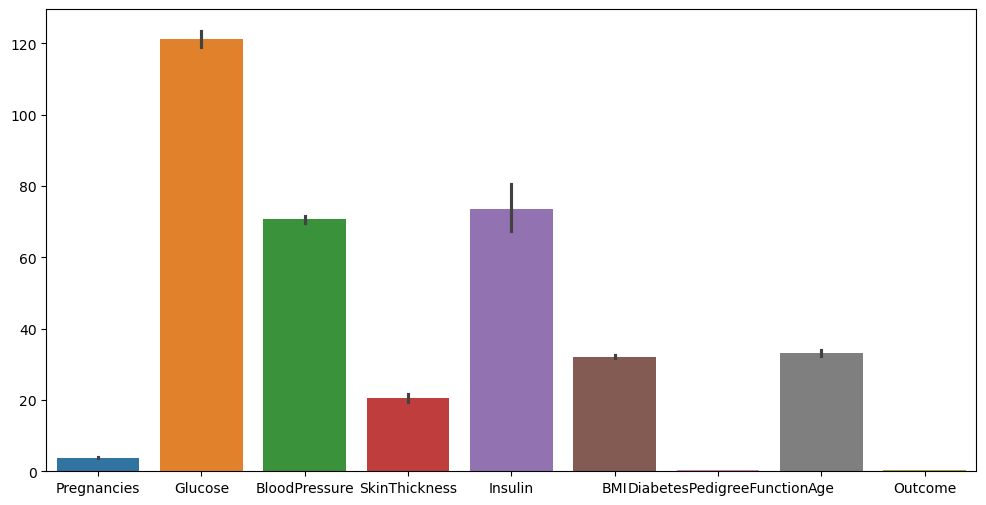

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(data=df)

<Axes: >

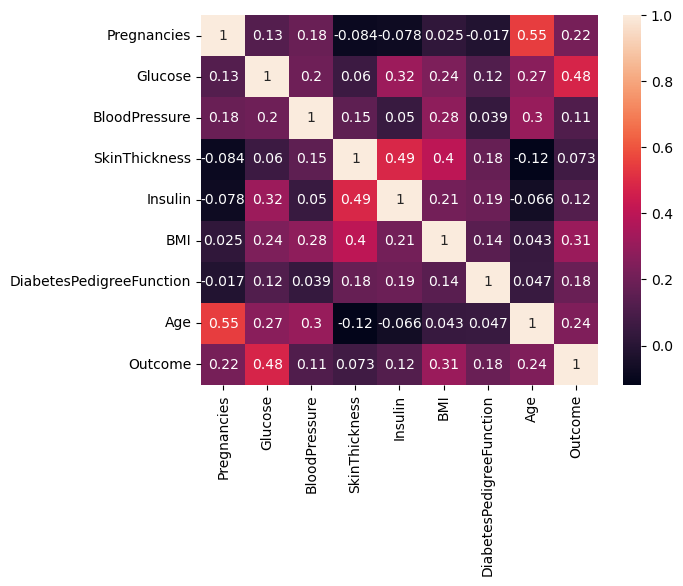

In [12]:
corr=df.corr()
sns.heatmap(corr,annot=True)

# Data Preprocessing

In [13]:
#no missing values

In [14]:
#The outcome column is the only categorical column which is already given in numerical value.So no need to encode

In [15]:
target=df[['Outcome']]
features=df.drop(columns=['Outcome'])

In [16]:
features.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   
1          1.0     85.0           66.0           29.0      0.0  26.6   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  
0                     0.627  50.0  
1                     0.351  31.0  
2                     0.672  32.0  
3                     0.167  21.0  
4                     1.200  33.0

In [17]:
target.head()

Outcome
0        1
1        0
2        1
3        0
4        1

In [18]:
min=MinMaxScaler()
scaled_features=min.fit_transform(features)
scaled_features

array([[0.44444444, 0.68494208, 0.51388889, ..., 0.54435484, 0.48930481,
        0.63736264],
       [0.07407407, 0.2957529 , 0.43055556, ..., 0.3561828 , 0.24331551,
        0.21978022],
       [0.59259259, 0.9011583 , 0.40277778, ..., 0.26747312, 0.52941176,
        0.24175824],
       ...,
       [0.37037037, 0.51814672, 0.51388889, ..., 0.34543011, 0.14884135,
        0.1978022 ],
       [0.07407407, 0.54903475, 0.34722222, ..., 0.45026882, 0.24153298,
        0.57142857],
       [0.07407407, 0.34517375, 0.48611111, ..., 0.45833333, 0.21122995,
        0.04395604]])

In [19]:
features=pd.DataFrame(scaled_features,columns=features.columns)
features.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.444444  0.684942       0.513889         0.4375  0.000000  0.544355   
1     0.074074  0.295753       0.430556         0.3625  0.000000  0.356183   
2     0.592593  0.901158       0.402778         0.0000  0.000000  0.267473   
3     0.074074  0.320463       0.430556         0.2875  0.295481  0.396505   
4     0.000000  0.616988       0.069444         0.4375  0.528094  0.799731   

   DiabetesPedigreeFunction       Age  
0                  0.489305  0.637363  
1                  0.243316  0.219780  
2                  0.529412  0.241758  
3                  0.079323  0.000000  
4                  1.000000  0.263736

In [20]:
scaled_target=min.fit_transform(target)
scaled_target

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],

In [21]:
target=pd.DataFrame(scaled_target,columns=target.columns)
target.head()

Outcome
0      1.0
1      0.0
2      1.0
3      0.0
4      1.0

# Building Predictive Models

In [22]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614, 1)
(154, 1)


LightGBM

In [23]:
lgb1= lgb.LGBMClassifier(n_estimators=200,learning_rate=0.2,subsample=1.0,max_features=1,random_state=50,
                       reg_alpha=10,reg_lambda =10,min_child_weight=2,max_bins=10,boosting_type='goss',bundling=True,
                       top_rate=0.2,other_rate=0.3)

In [24]:
lgb1.fit(x_train,y_train)


[LightGBM] [Warning] Unknown parameter: bundling
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Unknown parameter: bundling
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 215, number of negative: 399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 80
[LightGBM] [Info] Number of data points in th

LGBMClassifier(boosting_type='goss', bundling=True, learning_rate=0.2,
               max_bins=10, max_features=1, min_child_weight=2,
               n_estimators=200, other_rate=0.3, random_state=50, reg_alpha=10,
               reg_lambda=10, top_rate=0.2)

In [25]:
ypred=lgb1.predict(x_train)
ypred1=lgb1.predict(x_test)

[LightGBM] [Warning] Unknown parameter: bundling
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Unknown parameter: bundling
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


In [26]:
accuracy_score(y_train,ypred)

0.8159609120521173

In [27]:
accuracy_score(y_test,ypred1)

0.7207792207792207

In [28]:
print(classification_report(y_test,ypred1))

              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79       101
         1.0       0.60      0.57      0.58        53

    accuracy                           0.72       154
   macro avg       0.69      0.68      0.69       154
weighted avg       0.72      0.72      0.72       154



In [29]:
param={'n_estimators':[150,200],'learning_rate':[0.2,1],'reg_alpha':[10,20],'reg_lambda':[5,10],'min_child_weight':[1,2]}
grid_search=GridSearchCV(lgb1,param)
grid_search.fit(x_train,y_train)
grid_search.best_params_

[LightGBM] [Warning] Unknown parameter: bundling
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Unknown parameter: bundling
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 172, number of negative: 319
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 80
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 8
[LightGBM] [Info] U

{'learning_rate': 1,
 'min_child_weight': 1,
 'n_estimators': 200,
 'reg_alpha': 20,
 'reg_lambda': 10}

In [30]:
lgbm= lgb.LGBMClassifier(n_estimators=200,learning_rate=0.2,subsample=1.0,max_features=1,random_state=50,
                       reg_alpha=10,reg_lambda =10,min_child_weight=2,max_bins=10,boosting_type='goss',bundling=True,
                       top_rate=0.2,other_rate=0.3)
lgbm.fit(x_train,y_train)
ypress=lgbm.predict(x_train)
ypress1=lgbm.predict(x_test)

[LightGBM] [Warning] Unknown parameter: bundling
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Unknown parameter: bundling
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 215, number of negative: 399
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 80
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] U

In [31]:
accuracy_score(y_test,ypress1)

0.7207792207792207

XGBoost

In [32]:
xgb1= xgb.XGBClassifier(n_estimators=200,learning_rate=0.2,subsample=1.0,max_features=1,random_state=50,
                       reg_alpha=10,reg_lambda =10,min_child_weight=2)

In [33]:
xgb1.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_features=1, max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, ...)

In [34]:
ypre=xgb1.predict(x_train)
ypre1=xgb1.predict(x_test)

In [35]:
accuracy_score(y_train,ypre)

0.8469055374592834

In [36]:
accuracy_score(y_test,ypre1)

0.7272727272727273

In [37]:
print(classification_report(y_test,ypre1))

              precision    recall  f1-score   support

         0.0       0.77      0.83      0.80       101
         1.0       0.62      0.53      0.57        53

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154



In [38]:
params={'n_estimators':[50,100,150,200],'learning_rate':[0.1,0.2,0.5,1],'reg_alpha':[5,10,20],'reg_lambda':[5,10,20],'min_child_weight':[1,2,3,4]}
grid_search=GridSearchCV(xgb1,params)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'learning_rate': 1,
 'min_child_weight': 1,
 'n_estimators': 50,
 'reg_alpha': 10,
 'reg_lambda': 5}

In [39]:
xgbm= xgb.XGBClassifier(n_estimators=50,learning_rate=1,subsample=1.0,max_features=1,random_state=50,
                       reg_alpha=10,reg_lambda =5,min_child_weight=1)
xgbm.fit(x_train,y_train)
ypres=xgbm.predict(x_train)
ypres1=xgbm.predict(x_test)
accuracy_score(y_test,ypres1)

0.7467532467532467

In [40]:
print(classification_report(y_test,ypres1))

              precision    recall  f1-score   support

         0.0       0.79      0.84      0.81       101
         1.0       0.65      0.57      0.61        53

    accuracy                           0.75       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154



0

# Comparitive Analysis

XGBoost

In [42]:
print(classification_report(y_test,ypres1))

              precision    recall  f1-score   support

         0.0       0.79      0.84      0.81       101
         1.0       0.65      0.57      0.61        53

    accuracy                           0.75       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154



In [49]:
r=accuracy_score(y_test,ypres1)

<Axes: >

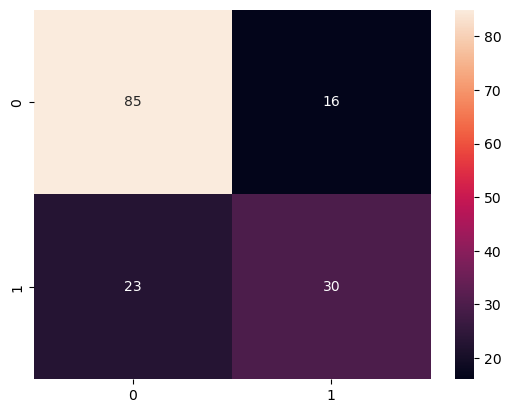

In [46]:
c=confusion_matrix(y_test,ypres1)
sns.heatmap(c,annot=True)

LightGBM

In [43]:
print(classification_report(y_test,ypress1))

              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79       101
         1.0       0.60      0.57      0.58        53

    accuracy                           0.72       154
   macro avg       0.69      0.68      0.69       154
weighted avg       0.72      0.72      0.72       154



In [50]:
r2=accuracy_score(y_test,ypress1)

<Axes: >

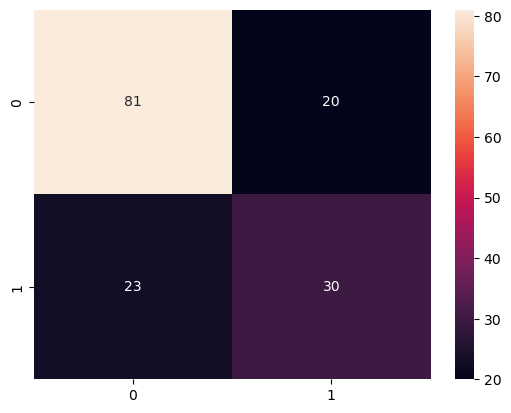

In [47]:
d=confusion_matrix(y_test,ypress1)
sns.heatmap(d,annot=True)

In [44]:
## XGBoost and LightGBM have almost same values with slight edge for XGBoost

In [53]:
data = {
    'Metric': ['XGBoost', 'LightGBM'],
    'Value': [r, r2]
}
df2= pd.DataFrame(data)

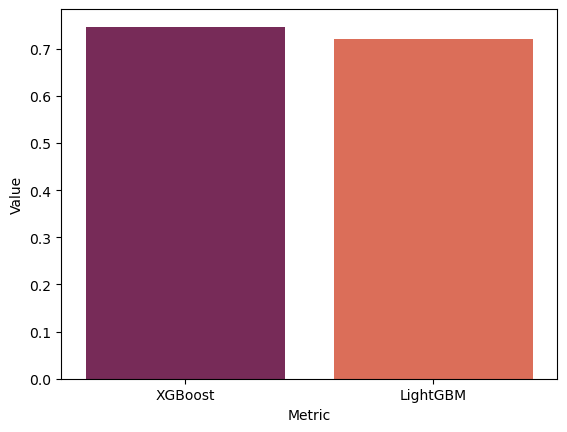

In [56]:
barplot = sns.barplot(x='Metric', y='Value', data=df2, palette='rocket')
plt.show()

In [57]:
## LightGBM is faster than XGBoost while XGBoost has more accuracy than LightGBM